In [36]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os


## Load the Data Set

In [7]:
df1 = pd.read_excel("case_study1.xlsx")

In [5]:
df2 = pd.read_excel("case_study2.xlsx")

In [4]:
df2.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [8]:
df1.isnull().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [10]:
#remove null values
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [11]:
df1.shape

(51296, 26)

In [15]:
#remove columns which have grater then 10000 null values in df2
columns_to_be_removed= []
for i in df2.columns:
    if df2.loc[df2[i]== -99999].shape[0] > 10000:
        columns_to_be_removed.append(i)


In [16]:
df2 = df2.drop(columns_to_be_removed, axis=1)

In [17]:
df2.shape

(51336, 54)

In [ ]:
for i in df2.columns:
    df2 = df2.loc[df2[i] != -99999]

In [21]:
#checking comman colmuns names
for i in list(df1.columns):
    if i in list(df2.columns):
        print(i)

PROSPECTID


In [22]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )


In [23]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.0,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.0,0.0,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.0,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.0,0.0,0,0,AL,AL,753,P1


In [24]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


<Axes: xlabel='MARITALSTATUS'>

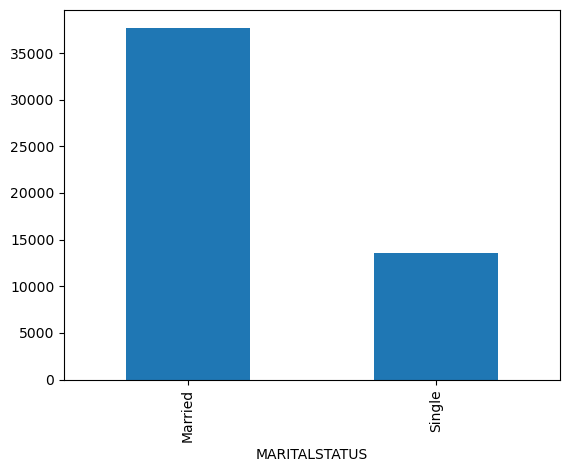

In [34]:
df['MARITALSTATUS'].value_counts().plot(kind='bar')

<Axes: xlabel='EDUCATION'>

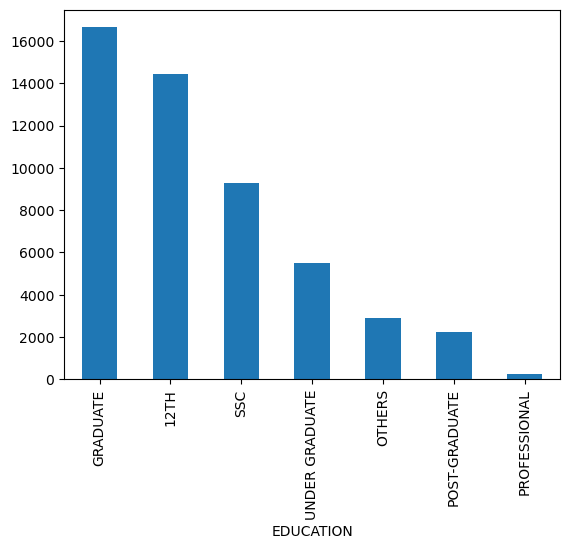

In [33]:
df['EDUCATION'].value_counts().plot(kind='bar')

<Axes: xlabel='last_prod_enq2'>

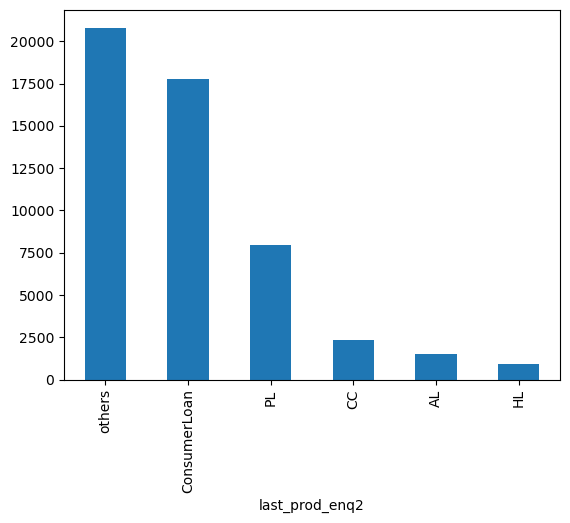

In [30]:
df['last_prod_enq2'].value_counts().plot(kind='bar')

<Axes: xlabel='first_prod_enq2'>

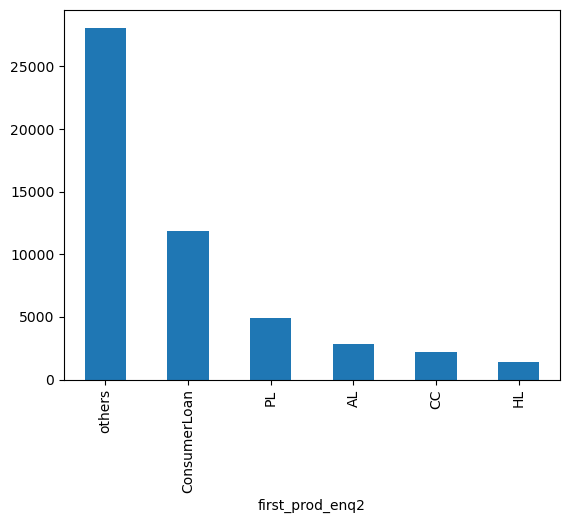

In [31]:
df['first_prod_enq2'].value_counts().plot(kind='bar')

<Axes: xlabel='Approved_Flag'>

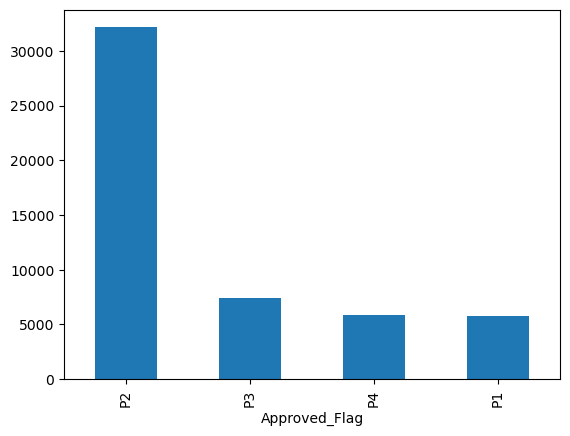

In [32]:
df['Approved_Flag'].value_counts().plot(kind='bar')

In [40]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)
# since all the categorical features here pval <=0.05 we will accept all

MARITALSTATUS --- 2.7347247145640217e-257
EDUCATION --- 6.772122013692765e-38
GENDER --- 0.000259241464445085
last_prod_enq2 --- 0.0
first_prod_enq2 --- 0.0


In [43]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)
        

In [44]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0



for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    
    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 10.96731827150461
0 --- 8.28043194336106
0 --- 6.4284822537064334
0 --- 5.510394576267278
1 --- 2.490043623809421


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1813.189446652738
2 --- 8.260638988187727
2 --- 3.6703254239467182
3 --- 5.694216446776836
4 --- 4.970645827346287
5 --- 2.002032552173907


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


6 --- inf
6 --- 4.788323772675488
7 --- 21.142530080727536
7 --- 32.03591658847898
7 --- 4.45209231888243
8 --- 2.99867711472123
9 --- 2.7991742557496364
10 --- 4.084955530280214
11 --- 2.1801475157113273
12 --- 5.113889440000782
13 --- 3.2475444801008324
14 --- 1.2747264556566777
15 --- 8.005890070879012
15 --- 5.39767218831123


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


16 --- inf
16 --- 7.274564152451656
16 --- 1.4153535674199758
17 --- 8.503819690047568
17 --- 1.6294794750057164
18 --- 7.078919419257024
18 --- 15.410978252728741
18 --- 1.8363243976160817
19 --- 1.565076628611904
20 --- 2.5460982721382095
21 --- 3.1032891116488006
22 --- 2.1942877979786655
23 --- 7.383989877498994
23 --- 2.0751482560411603
24 --- 2.726449304987256
25 --- 6.293135612441871
25 --- 2.710267787144797
26 --- 4.923780392902989
27 --- 347440509.5926095
27 --- 2991543440.4349923
27 --- 11936689705.599522
27 --- 1408975611.9399073
27 --- 1782848308.7841969
27 --- 5336252451.079604
27 --- 494571895.8992288
27 --- 8494.670892803804
27 --- 666304530.2187972
27 --- 783906969.1539816
27 --- 1.3267888481797097
28 --- 21.7338293165276
28 --- 2.8690860362884316
29 --- 3.3940577996889245
30 --- 9.358233250211832
30 --- 6.988945461891267
30 --- 1.0053521595659218
31 --- 3.0721346286046023
32 --- 2.727775618650995
33 --- 20.732955972008966
33 --- 16.17170247740565
33 --- 1.4325207945649

In [51]:
df.shape

(51296, 79)

In [53]:
# check Anova for columns_to_be_kept 

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])  
    b = list(df['Approved_Flag'])  
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)



In [55]:
# feature selection is done for cat and num features




# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

In [56]:
# Label encoding for the categorical features
['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']



df['MARITALSTATUS'].unique()    
df['EDUCATION'].unique()
df['GENDER'].unique()
df['last_prod_enq2'].unique()
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [57]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3

In [58]:
# Others has to be verified by the business end user 




df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3


In [59]:
df['EDUCATION'].value_counts()
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51296 entries, 0 to 51295
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            51296 non-null  float64
 1   pct_tl_closed_L6M          51296 non-null  float64
 2   Tot_TL_closed_L12M         51296 non-null  int64  
 3   pct_tl_open_L12M           51296 non-null  float64
 4   pct_tl_closed_L12M         51296 non-null  float64
 5   Tot_Missed_Pmnt            51296 non-null  int64  
 6   CC_TL                      51296 non-null  int64  
 7   Home_TL                    51296 non-null  int64  
 8   PL_TL                      51296 non-null  int64  
 9   Secured_TL                 51296 non-null  int64  
 10  Unsecured_TL               51296 non-null  int64  
 11  Other_TL                   51296 non-null  int64  
 12  Age_Oldest_TL              51296 non-null  int64  
 13  Age_Newest_TL              51296 non-null  int

In [60]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])



df_encoded.info()
k = df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51296 entries, 0 to 51295
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               51296 non-null  float64
 1   pct_tl_closed_L6M             51296 non-null  float64
 2   Tot_TL_closed_L12M            51296 non-null  int64  
 3   pct_tl_open_L12M              51296 non-null  float64
 4   pct_tl_closed_L12M            51296 non-null  float64
 5   Tot_Missed_Pmnt               51296 non-null  int64  
 6   CC_TL                         51296 non-null  int64  
 7   Home_TL                       51296 non-null  int64  
 8   PL_TL                         51296 non-null  int64  
 9   Secured_TL                    51296 non-null  int64  
 10  Unsecured_TL                  51296 non-null  int64  
 11  Other_TL                      51296 non-null  int64  
 12  Age_Oldest_TL                 51296 non-null  int64  
 13  A

In [61]:
# Machine Learing model fitting

# Data processing

# 1. Random Forest

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [62]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)

In [64]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [65]:
y_pred = rf_classifier.predict(x_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.7817738791423002

Class p1:
Precision: 0.822
Recall: 0.7179039301310044
F1 Score: 0.7664335664335664

Class p2:
Precision: 0.8163838032874515
Recall: 0.936963190184049
F1 Score: 0.8725273155752339

Class p3:
Precision: 0.43796711509715996
Recall: 0.1991842284160435
F1 Score: 0.2738317757009346

Class p4:
Precision: 0.7193140794223827
Recall: 0.7090747330960854
F1 Score: 0.71415770609319



In [72]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.73

Class p1:
Precision: 0.6944908180300501
Recall: 0.7266375545851529
F1 Score: 0.7102005975245412

Class p2:
Precision: 0.8251675353685778
Recall: 0.8498466257668712
F1 Score: 0.8373252738949755

Class p3:
Precision: 0.3424336973478939
Recall: 0.29843643779741674
F1 Score: 0.3189248092989466

Class p4:
Precision: 0.6525821596244131
Recall: 0.6183274021352313
F1 Score: 0.6349931475559616

